Objective:
Car Price Prediction using Linear Regression

Step 1: Import libraries
Hints:

You can import train_test_split from sklearn.model_selection
You can import r2_score from sklearn.metrics
You can import seaborn with alias sns

In [65]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns 

In [74]:
df = pd.read_csv("car data.csv")
#print top 5 rows of the dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Step 3: EDA
Hints:

To print the shape of the DataFrame (number of rows and columns), you can use the shape attribute of the DataFrame df.
To display information about the DataFrame, including data types and non-null values, you can use the info() method.
To print summary statistics of the DataFrame (e.g., mean, min, max), you can use the describe() method.
To check for missing values in the DataFrame, you can use the isnull() method followed by the sum() method.

In [75]:
df_shape=df.shape
print("Shape of the dataframe is: ",df_shape) 

Shape of the dataframe is:  (301, 9)


In [76]:
df_info=df.info()
print("Information about the dataframe:\n ")
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Information about the dataframe:
 


In [77]:
df_describe = df.describe()
print("Summary statistics of the dataframe:\n")
df_describe

Summary statistics of the dataframe:



,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [78]:
df_null_count = df.isnull().sum()
print("Missing values counts of dataframe:\n")
df_null_count

Missing values counts of dataframe:



Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [80]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

Step 4: Encode categories
Fuel_Type, Seller_Type, and Transmission are categorical variables with no inherent ordinal relationship among their categories. For example, in Fuel_Type, "Petrol" is not inherently "greater" or "lesser" than "Diesel"; they are simply different fuel types. One-hot encoding is generally preferred for such nominal categorical variables because it doesn't introduce any ordinality and allows the model to treat the categories as independent.
The Car_Name has high cardinality and also the data is nominal, using One Hot Encoding on it will result in too many columns. And since its nominal we cannot use LabelEncoding.So keeping in view the size of the data we can ignore that feature. But you are open to try that as well.
Hints:

Encode 'Fuel_Type', 'Seller_Type', 'Transmission' columns
Use the drop_first=True argument is used to drop the first category in each encoded variable to avoid multicollinearity (the "dummy variable trap"). This means that for each categorical variable, one category is represented by zeros in all other columns, and the absence of zeros indicates the presence of that category.

In [81]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)
#Display the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Car_Name                301 non-null    object 
 1   Year                    301 non-null    int64  
 2   Selling_Price           301 non-null    float64
 3   Present_Price           301 non-null    float64
 4   Kms_Driven              301 non-null    int64  
 5   Owner                   301 non-null    int64  
 6   Fuel_Type_Diesel        301 non-null    uint8  
 7   Fuel_Type_Petrol        301 non-null    uint8  
 8   Seller_Type_Individual  301 non-null    uint8  
 9   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(4)
memory usage: 15.4+ KB


# Step 5: Split data
Hints:

Drop the target column and any other required columns from correct axis and take the features into X
Take the correct target column into y
Use train_test_split to split the dataset into 80% for training and 20% for testing along with setting random_state

In [82]:
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)   
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240, 8)
X_test shape: (61, 8)
y_train shape: (240,)
y_test shape: (61,)


# Step 6: Train model
Hints:

You can fit the regression model on training data

In [83]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Step 7: Evaluate model and Print metrics
Hints:

You can use the regression model to predict on the test data
Calculate the r2_score using the actual and predicted outputs
Calculate the Root Mean Squared error(RMSE) by taking square root of mse

In [84]:
y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
adjusted_r2_score = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
rmse =  np.sqrt(mse)

In [85]:
print('R-squared:', r2)
print('Mean Squared Error:', mse)
print('Adjusted R-Squared:',adjusted_r2_score) 
print('RMSE:', rmse)

R-squared: 0.8489813024899057
Mean Squared Error: 3.4788039706379235
Adjusted R-Squared: 0.825747656719122
RMSE: 1.865155213551388


# Step 8: Feature importance
Hints:

Use the attribute containing the coefficients of model

In [86]:
coefs = lm.coef_
print(coefs)

[ 3.53801365e-01  4.29152503e-01 -6.15725866e-06 -9.03759824e-01
  2.53327258e+00  7.38464226e-01 -1.19059291e+00 -1.63902155e+00]


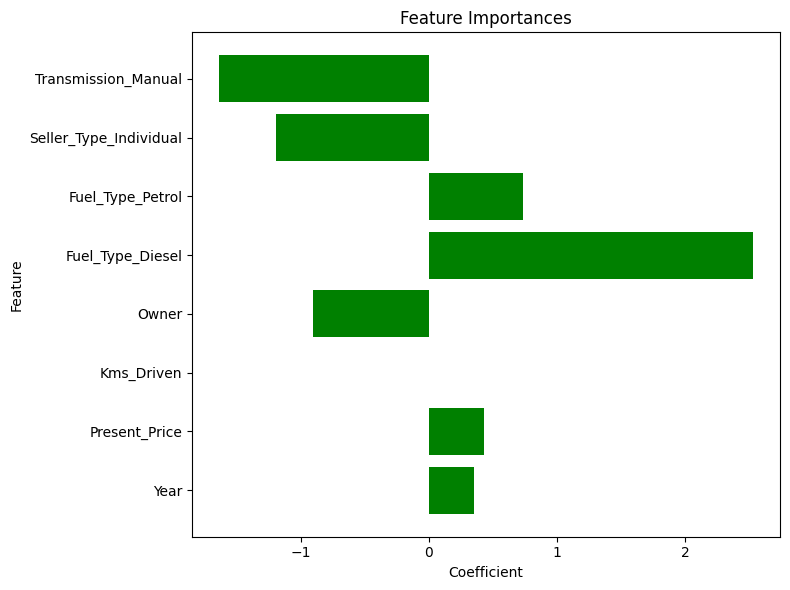

In [87]:
plt.figure(figsize=(8,6))
plt.barh(range(len(coefs)), coefs, align='center', color='green')
plt.yticks(range(len(coefs)), X.columns)
plt.title("Feature Importances")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Diagnostic plots
Step 9: Plot residuals
Hints:

Scatter plot of y_pred vs y_pred - y_test with any color

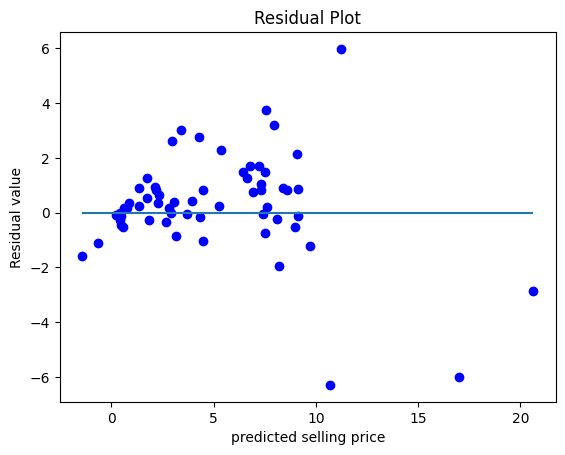

In [88]:
scatter_plot = plt.scatter(y_pred, y_pred - y_test, c='blue')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max()) 
plt.xlabel("predicted selling price")
plt.ylabel("Residual value")
plt.title('Residual Plot')
plt.show()

# Step 10: Plot error distribution
Hints:

You can use distribution plot(histogram) on y_pred-y_test

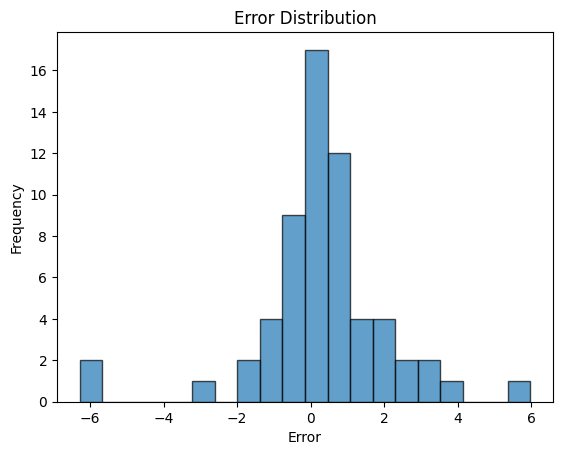

In [89]:
# Calculate the error
error = y_pred - y_test

# Create a histogram
error_histogram = plt.hist(error, bins=20, edgecolor='k', alpha=0.7)

# Add a title and labels
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')

# Show the histogram
plt.show()